## Plot of $\cos(40x)\exp(-x^2)$ bounded by the curves $\exp(-x^2)$ and $-\exp(-x^2)$

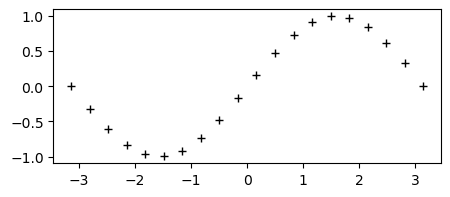

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,2))
x = np.linspace(-np.pi, np.pi, 20)
y = np.sin(x)

plt.plot(x,y,'+',color='k')
plt.show()

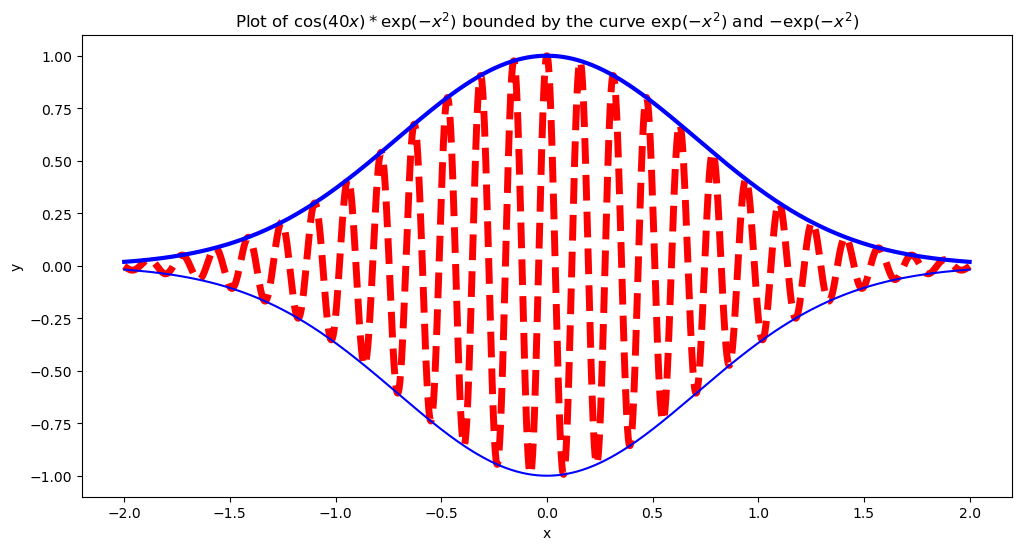

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,2000)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)

plt.figure(figsize=(12,6))
plt.plot(x,y1*y2,ls='--',color='red',lw=5)
plt.plot(x,y2,color='blue',lw=3)
plt.plot(x,-y2,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $\cos(40x)*\exp(-x^2)$ bounded by the curve $\exp(-x^2)$ and $-\exp(-x^2)$')
plt.show()

## Reading the Biogeochemical Parameters from a Excel file and calculating the Dissolved Oxygen Saturations levels and plotting the regions with super-saturations and under-saturations

<IPython.core.display.Javascript object>


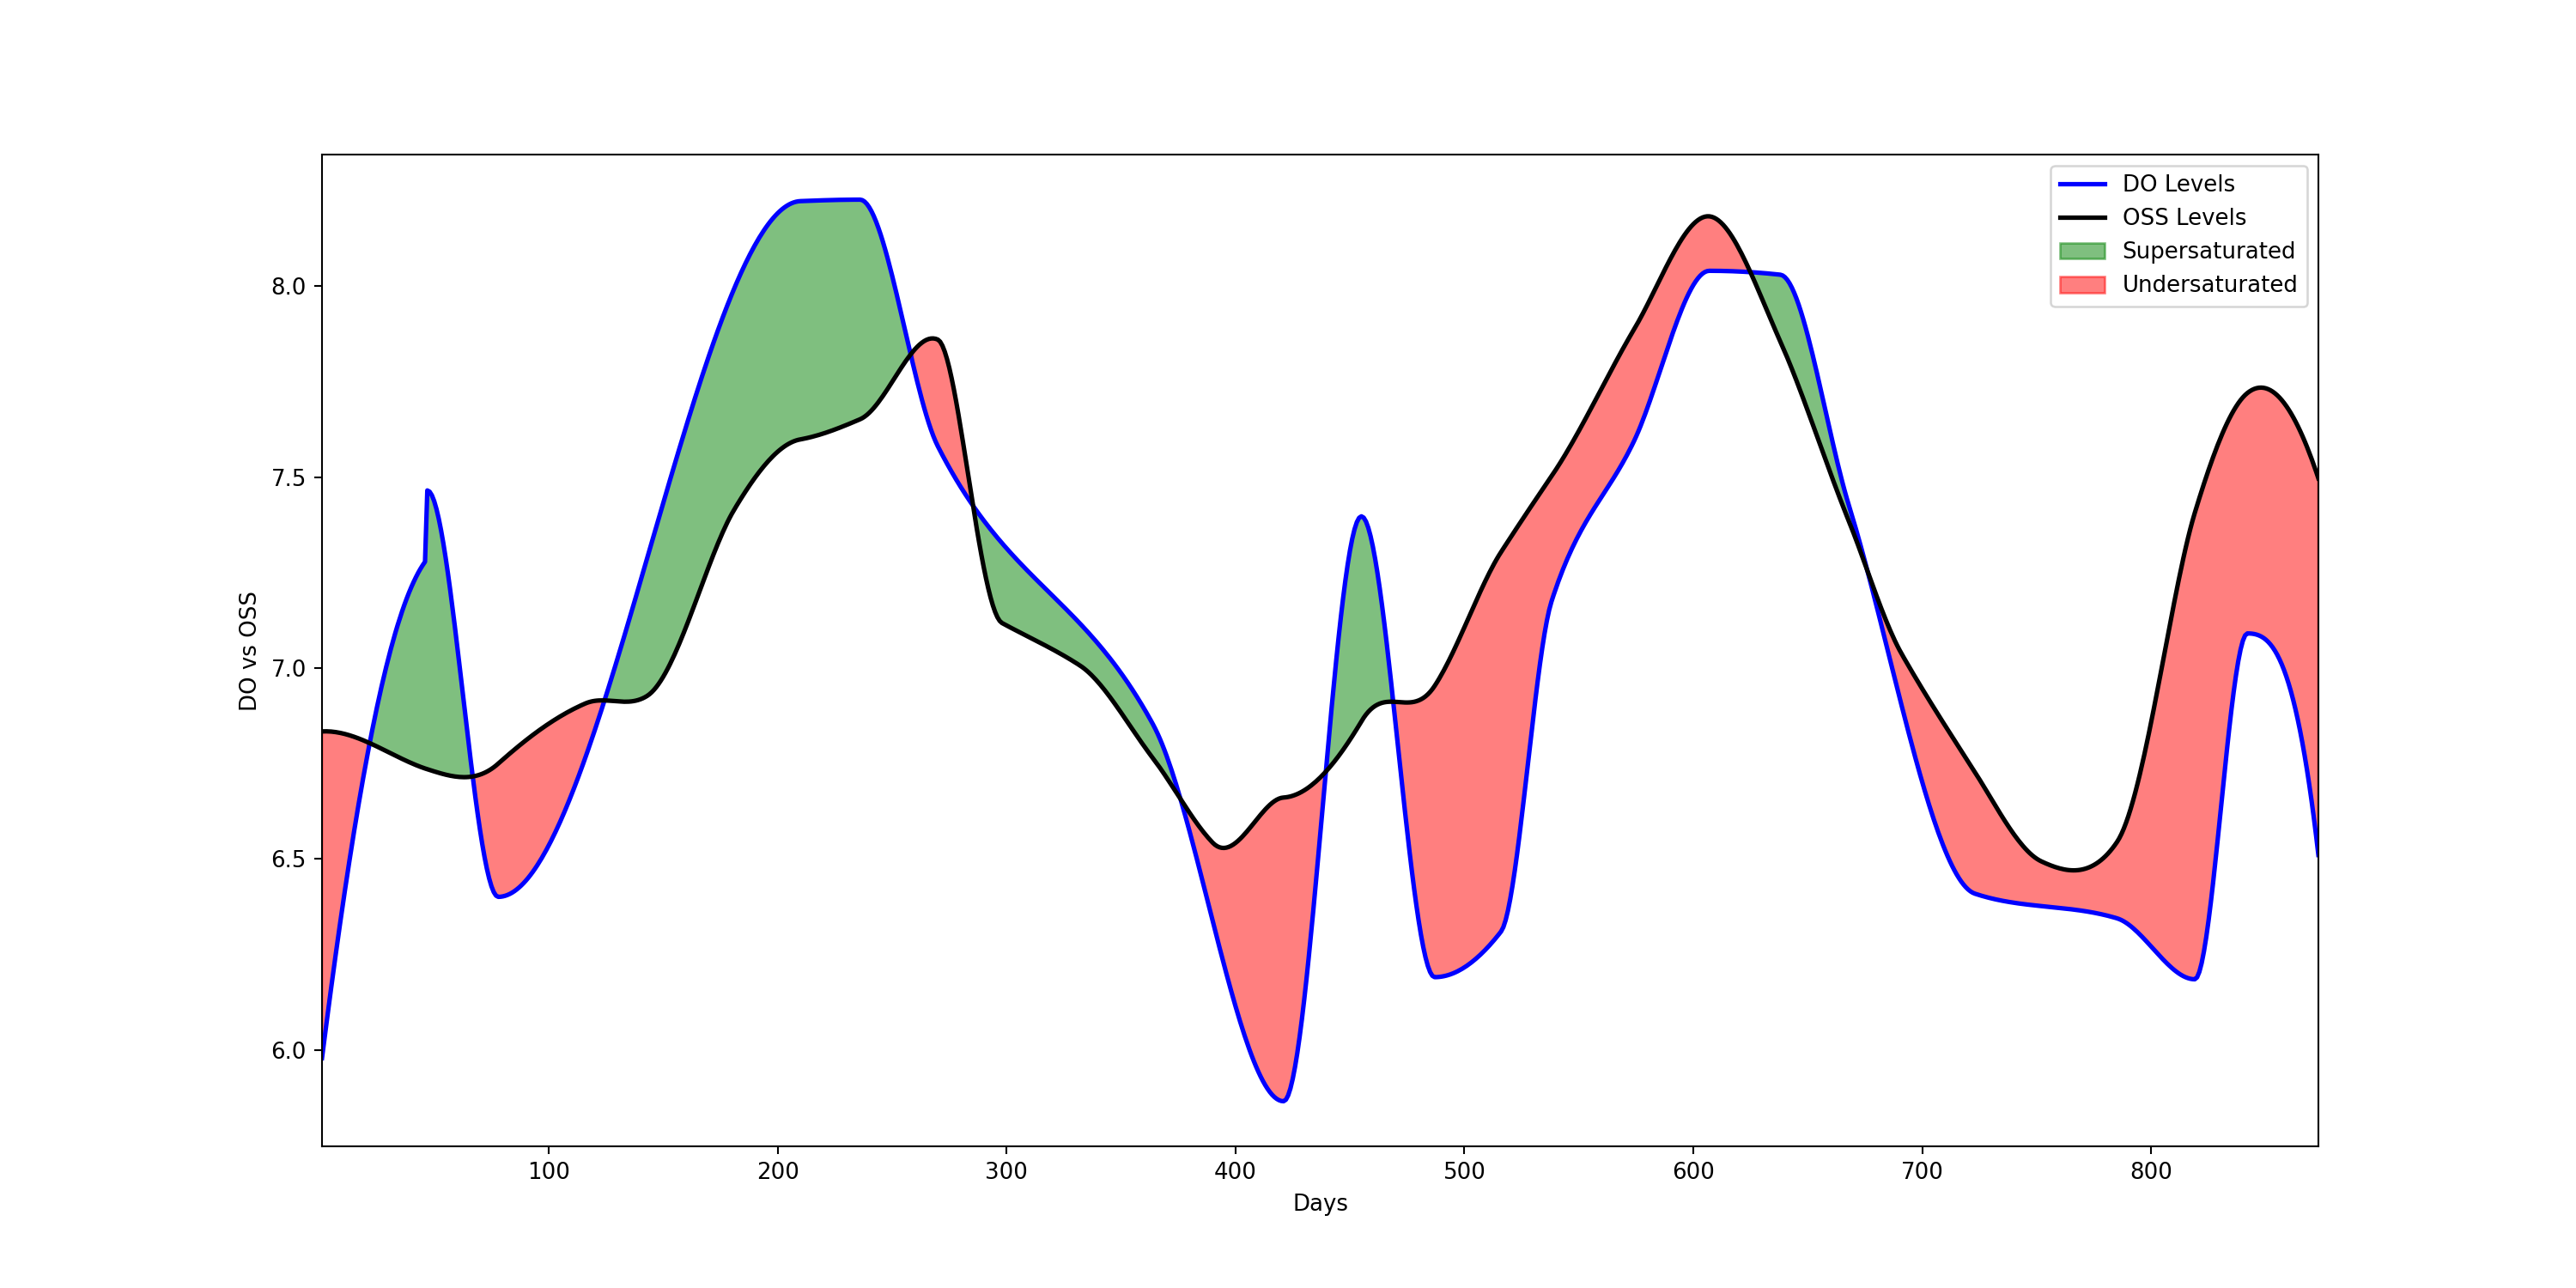

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#auto, gtk, qt, inline
%matplotlib auto

Data = pd.read_excel('DO_OSS_Parameters-Orignal.xlsx')

Days = Data['Days']
DO = Data['DO']
WT = Data['WaterTemp']
S = Data['Salinity']
WS = Data['WindSpeed']

WT = WT+273.15 #Converting Temp from ^oC to Kelvin

LogOSF = -139.34411 + (1.575701*(10**5))/WT - (6.642308*(10**7))/(WT**2) +  \
            (1.2438*(10**10))/(WT**3) - \
            (8.621949*(10**11))/(WT**4);
LogOSS = LogOSF - S*(1.7674*(10**-2) - (1.0754*10)/WT + (2.1407*(10**3))/(WT**2));
OSS    = np.exp(LogOSS);

Data['OSS'] = OSS

plt.figure(figsize=(16,8))
#with plt.xkcd():
plt.plot(Days,DO,color='blue',lw=2,label='DO Levels')
plt.plot(Days,OSS,color='black',lw=2,label='OSS Levels')
plt.fill_between(Days,DO,OSS,where=(DO > OSS),color='green',alpha=0.5,label='Supersaturated')
plt.fill_between(Days,DO,OSS,where=(DO < OSS),color='red',alpha=0.5,label='Undersaturated')
plt.xlim(1,873)
plt.xlabel('Days')
plt.ylabel('DO vs OSS')
plt.legend()
    
plt.show()

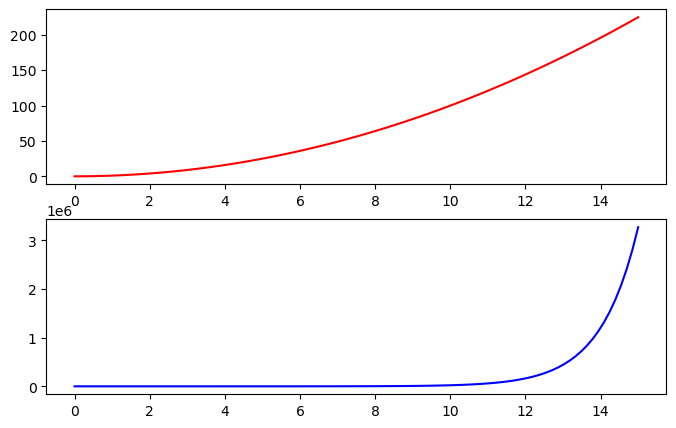

In [47]:
x = np.linspace(0,15,100)
y1 = x**2
y2 = np.exp(x)

plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(x,y1,'r')
plt.subplot(212)
plt.plot(x,y2,'b')
plt.show()

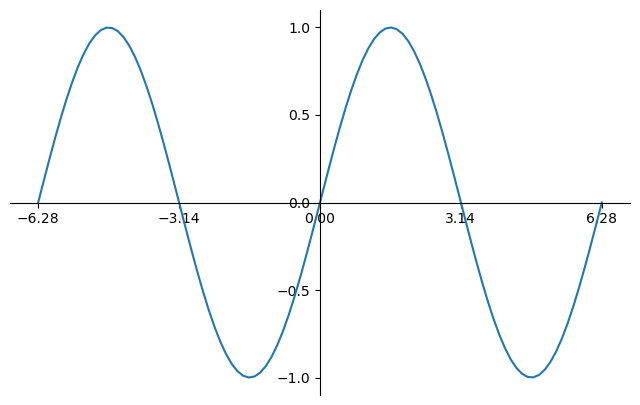

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(x,y)

# remove top and right spines (axis)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spines (axis) ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine (axis) to $x = 0$ and $y=0$
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# set x-axis ticks
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

# for saving the figure you can use the command
fig.savefig('MyPlot.png')